# EDA

## Содержание <br><br>
Обзор данных <br>
- описание данных
- цель 
- задачи 
- первичный осмотр данных <br> <br>
Предобработка данных <br>
- работа с nan значениями, дубликатами 
- Работа с выбросами <br><br>
Анализ данных <br>
Выводы

## Обзор данных

### 🔍 Описание данных
В распоряжении данные о покупках пользователей. Каждая транзакция содержит следующую информацию:
- наименование купленного товара, 
- цена и количество купленного товара, 
- место совершения покупки (в магазине или онлайн), 
- способ оплаты (банковская карта или наличные),
- дата транзакции. <br> <br><br>
 

| Название столбца       | Описание                                       |
|------------------------|------------------------------------------------|
| Transaction ID         | Уникальный идентификатор транзакции           |
| Customer ID            | Уникальный идентификатор клиента               |
| Category               | Категория товара                               |
| Item                   | Название товара                                |
| Price Per Unit         | Цена за единицу товара                         |
| Quantity               | Количество приобретённого товара               |
| Total Spent            | Общая сумма покупки                            |
| Payment Method         | Способ оплаты                                  |
| Location               | Формат покупки (Online / In-store)             |
| Transaction Date       | Дата совершения транзакции                     |
| Discount Applied       | Применялась ли скидка (True / False / NaN)     |


### 🎯 Цель анализа

Целью данного исследования будет выявление ключевых факторов, оказывающих влияние на общую выручку магазина. Проследив закономерности в представленных данных, удастся выдвинуть предположения, как улучшить интересующую нас метрику,а именно прибыль магазина 


### 📝 Задачи анализа
- изучить данные о транзакциях,
- выявить основные закономерности, 
- изучить распределение и аномалии в данных, 
- выявить наиболее востребованные категории товара, 
- проследить влияние различных факторов (месяц транзацакции, способ оплаты, 
- онлайн или в магазине совершалась покупка) на выручку магазина

__Приступим к первичному осмотру данных__


Импортируем необходимые библиотеки 

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Создадим переменную, в которой считываем данные о покупках, и посмотрим на первые 20 строк 

In [172]:
data = pd.read_csv('retail_store_sales.csv', sep = ',')
data.head(20)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


Выведем информацию о датафрейме с помощью метода info()

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


Построим гистограммы для каждого столбца

array([[<Axes: title={'center': 'Price Per Unit'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Total Spent'}>, <Axes: >]], dtype=object)

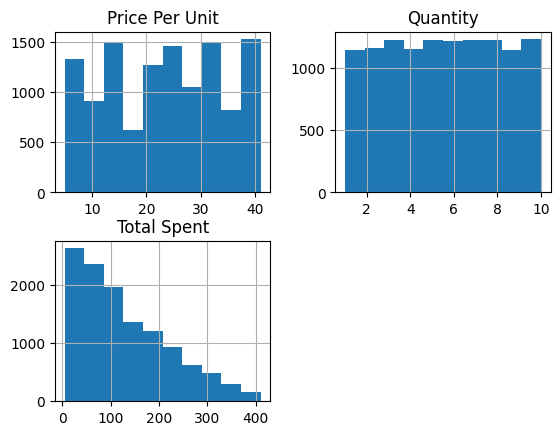

In [174]:
data.hist()

## Предобработка данных

### Переименование столбцов

Для удоства дальнейшего анализа переименуем столбцы, приведя все к нижнему регистру и заменив пробел на '_'

In [175]:
data.columns = [col.lower().replace(' ', '_') for col in data.columns]
data.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')

### Обработка пропусков


In [176]:
data['item'].isna().sum()

np.int64(1213)

#### Столбец `item`

In [177]:
data['item'].nunique()

200

В столбце `item` содержится наименование товара. Было обнаружено 1213 пропусков. Так как на основе имеющихся данных невозможно восстановить пропущенные значения, а из-за большого количества мы не можем просто удалить эти строки, то заменим пропуски на 'unknown'

In [178]:
data['item'].fillna('unknown', inplace = True)

C:\Users\ILIYA\AppData\Local\Temp\ipykernel_14448\4057655225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['item'].fillna('unknown', inplace = True)


Проверим количество пропусков в столбце `item`

In [179]:
data['item'].isna().sum()

np.int64(0)

#### Столбец `price_per_unit` 

In [180]:
data['price_per_unit'].isna().sum()

np.int64(609)

В столбце `price_per_unit` содержится цена за единицу товара. В этом столбце 609 пропусков. Можно заполнить пропущенные значения, поделив общую стоимость покупки (`total_spent`) на количество товара (`quantity`) 

In [181]:
data['price_per_unit'].fillna(data['total_spent']/data['quantity'], inplace = True)


C:\Users\ILIYA\AppData\Local\Temp\ipykernel_14448\3044829122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price_per_unit'].fillna(data['total_spent']/data['quantity'], inplace = True)


Проверим пропуски в столбце `price_per_unit`

In [182]:
data['price_per_unit'].isna().sum()

np.int64(0)

#### Столбец `quantity`

In [183]:
data['quantity'].isna().sum()

np.int64(604)

Столбце `quantity` содержит информацию о количестве товаров в заказе. В столбце 604 пропуска. Заполним пропущенные значения медианой по всем товарам данной категории 

In [184]:
data['quantity'].fillna(data.groupby('category')['quantity'].transform('median'), inplace=True)



C:\Users\ILIYA\AppData\Local\Temp\ipykernel_14448\481423378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['quantity'].fillna(data.groupby('category')['quantity'].transform('median'), inplace=True)


Проверим количество пропусков в столбце `quantity`

In [185]:
data['quantity'].isna().sum()

np.int64(0)

#### Столбец `total_spent`

In [186]:
data['total_spent'].isna().sum()

np.int64(604)

Столбец `total_spent` содержит информацию о стоимости всего заказа. В этом столбце 604 пропуска. Заполнить пропущенные значения можно умножив цену за единицу товара (`price_per_unit`) на количество товара в заказе (`quantity`)

In [187]:
data['total_spent'].fillna(data['quantity']*data['price_per_unit'], inplace = True)

C:\Users\ILIYA\AppData\Local\Temp\ipykernel_14448\3052176469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_spent'].fillna(data['quantity']*data['price_per_unit'], inplace = True)


In [188]:
data['total_spent'].isna().sum()

np.int64(0)

#### Столбец `discount_applied`

In [189]:
data['discount_applied'].isna().sum()

np.int64(4199)

В столбце `discount_applied` содержится информация о скидке. Пропусков в этом столбце очень много (4199). Вероятно, произошел сбой в системе фиксации наличия скидки или пропуск говорит об ее отсутствии, но заполнение такого большого количества данных определенным значением (True, False) может в дальнейшем исказить результаты анализа и удаление такого большого количества строк с пропущенными значениями не является рациональным решением. Поэтому заполним пропущенные значения в этом столбце на 'unknown'

In [190]:
data['discount_applied'].fillna('unknown', inplace=True)

C:\Users\ILIYA\AppData\Local\Temp\ipykernel_14448\1801897495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['discount_applied'].fillna('unknown', inplace=True)


In [191]:
data['discount_applied'].isna().sum()

np.int64(0)

### Изменение типов данных


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    12575 non-null  object 
 1   customer_id       12575 non-null  object 
 2   category          12575 non-null  object 
 3   item              12575 non-null  object 
 4   price_per_unit    12575 non-null  float64
 5   quantity          12575 non-null  float64
 6   total_spent       12575 non-null  float64
 7   payment_method    12575 non-null  object 
 8   location          12575 non-null  object 
 9   transaction_date  12575 non-null  object 
 10  discount_applied  12575 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


Из приведенной выше информации видно, что большинство столбцов имеют тип данных object, однако некоторые столбцы данные нужно привести к другому типу. Столбец `quantity` необходимо привести к типу int64, так как количество товара представляет собой целое число, также неоходимо столбец `transaction_date` привести к типу datetime64

In [193]:
data['quantity']=data['quantity'].astype('int64')
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

In [194]:
data.head()

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,unknown
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,False


### Поиск и удаление дубликатов

Проверим данные на наличие дубликатов

In [195]:
data.transaction_id.nunique()

12575

Дубликаты обнаружены не были, датафрейм содержит данные о 12575 транзакциях

### Редкие и выбивающиеся значения

#### Рассмострим столбец `price_per_unit`

In [196]:
data['price_per_unit'].describe()

count    12575.000000
mean        23.369304
std         10.748728
min          5.000000
25%         14.000000
50%         23.000000
75%         33.500000
max         41.000000
Name: price_per_unit, dtype: float64

Построим диаграмму размаха столбца `price_per_unit`

<Axes: ylabel='price_per_unit'>

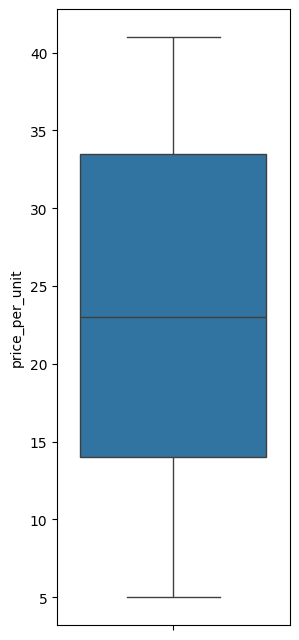

In [197]:
plt.figure(figsize=(3,8))
sns.boxplot(data=data['price_per_unit'])


На диаграмме размаха видно, что в столбце `price_per_unit` отсутствуют выбивающиеся значения, это можно судить по отсутствию точек за пределами межквартильного размаха. Минимальная цена составляет 5, максимальная - более 40

#### Рассмострим столбец `price_per_unit`

In [198]:
data['quantity'].describe()

count    12575.000000
mean         5.552922
std          2.790274
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: quantity, dtype: float64

Построим диаграмму размаха для столбца `quantity`

<Axes: ylabel='quantity'>

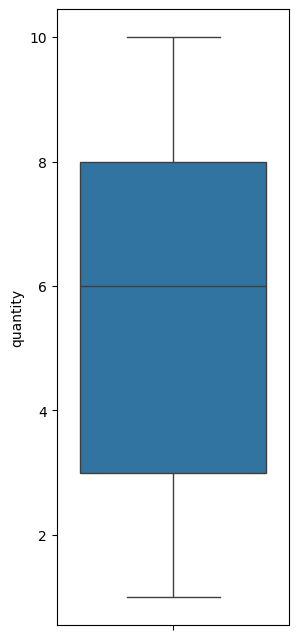

In [199]:
plt.figure(figsize=(3,8))
sns.boxplot(data=data['quantity'])

На диаграмме размаха видно, что в столбце `quantity` отсутствуют выбивающиеся значения, это можно судить по отсутствию точек за пределами межквартильного размаха. Значения количества товара распределились от 1 до 10 за одну покупку.

#### Рассмострим столбец `price_per_unit`

In [200]:
data['total_spent'].describe()

count    12575.000000
mean       130.075109
std         93.538217
min          5.000000
25%         52.000000
50%        110.000000
75%        192.000000
max        410.000000
Name: total_spent, dtype: float64

Построим диаграмму размаха для столбца `price_per_unit`

<Axes: ylabel='total_spent'>

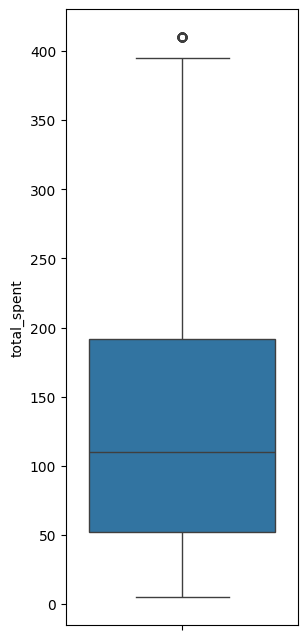

In [201]:
plt.figure(figsize=(3,8))
sns.boxplot(data = data['total_spent'])

На диаграмме размаха видно, что в столбце `total_spent` присутствует выбивающееся значение, так как общая стоимость одной из покупок составила более 400. Этот случай можно интепретировать не как сбой в системе, а просто как большую покупку. Данное значение отражает реальную вполне возможную транзакцию и не окажет негативного влияния на дальнейший анализ

### Добавление новых столбцов

Для более детального анализа добавим в наш датафрейм некоторые столбцы

__Месяц транзакции__

In [202]:
data['transaction_month'] = data['transaction_date'].dt.month
data['transaction_month']

0         4
1         7
2        10
3         5
4        10
         ..
12570     9
12571     8
12572     8
12573    12
12574     8
Name: transaction_month, Length: 12575, dtype: int32

__Год транзакции__

In [203]:
data['transaction_year'] = data['transaction_date'].dt.year
data['transaction_year']

0        2024
1        2023
2        2022
3        2022
4        2022
         ... 
12570    2023
12571    2022
12572    2024
12573    2023
12574    2022
Name: transaction_year, Length: 12575, dtype: int32

Также для анализа по месяцам в каждом конкретном году создадим соответствующий столбец

In [204]:
data['transaction_month_of_year'] = data['transaction_date'].dt.to_period('M')
data['transaction_month_of_year']

0        2024-04
1        2023-07
2        2022-10
3        2022-05
4        2022-10
          ...   
12570    2023-09
12571    2022-08
12572    2024-08
12573    2023-12
12574    2022-08
Name: transaction_month_of_year, Length: 12575, dtype: period[M]

## Исследовательский анализ данных

In [205]:
data.head()

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,transaction_month,transaction_year,transaction_month_of_year
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,True,4,2024,2024-04
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,True,7,2023,2023-07
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,False,10,2022,2022-10
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,unknown,5,2022,2022-05
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,False,10,2022,2022-10


### Посмотрим на распределение данных в столбце `location`

C:\Users\ILIYA\AppData\Local\Temp\ipykernel_14448\3870991287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'location', data = data, palette='husl')


Text(0, 0.5, 'Количество')

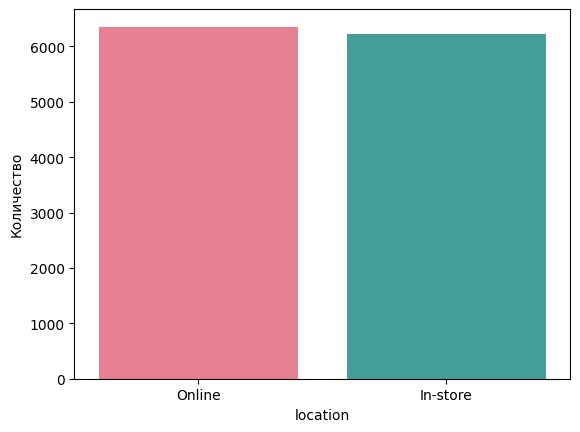

In [206]:
sns.countplot(x = 'location', data = data, palette='husl')
plt.ylabel('Количество')

Из распределения видно, что покупки онлайн и офлайн распределились примерно одинаково, что говорит об отсутствии более востребованного способа совершения покупок


### Посмотрим на распределение данных в столбце `payment_method`

C:\Users\ILIYA\AppData\Local\Temp\ipykernel_14448\1988272733.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'payment_method', data =data, palette='husl')


Text(0, 0.5, 'Количество')

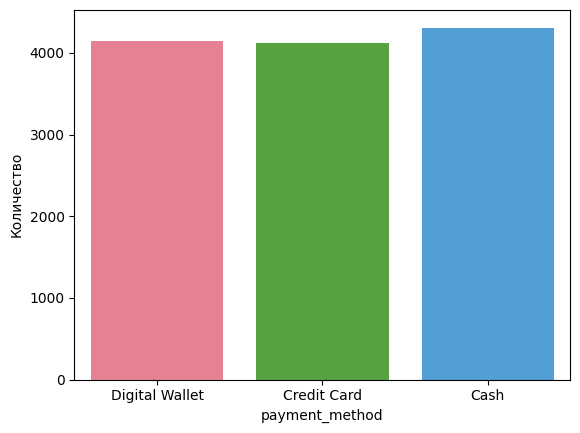

In [207]:
sns.countplot(x = 'payment_method', data =data, palette='husl')
plt.ylabel('Количество')

Из полученных результатов можем сделать вывод, что среди покупателей нет более предпочтительного способа оплаты. Все 3 способа распределились примерно поровну

### Посмотрим на распределение данных в столбце `category`


#### Наиболее востребованная категория товара за весь период

In [208]:
data.groupby('category')['transaction_id'].count()

category
Beverages                             1567
Butchers                              1568
Computers and electric accessories    1558
Electric household essentials         1591
Food                                  1588
Furniture                             1591
Milk Products                         1584
Patisserie                            1528
Name: transaction_id, dtype: int64

Text(0, 0.5, 'Количество')

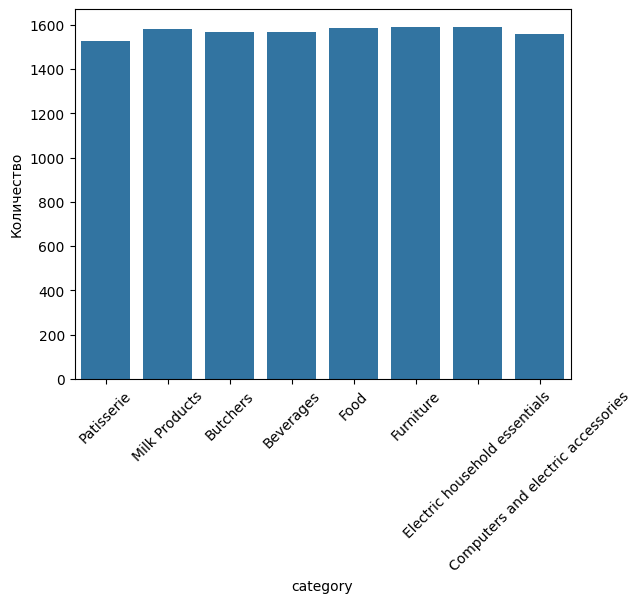

In [209]:
sns.countplot(x = 'category', data =data)
plt.xticks(rotation = 45)
plt.ylabel('Количество')

По гистограмме видно, что на каждую категорию приходится примерно одинаковое количество транзакций. То есть преобладающей категории среди существующих нет

#### Наиболее востребованная категория товара по годам

Text(0, 0.5, 'Количество')

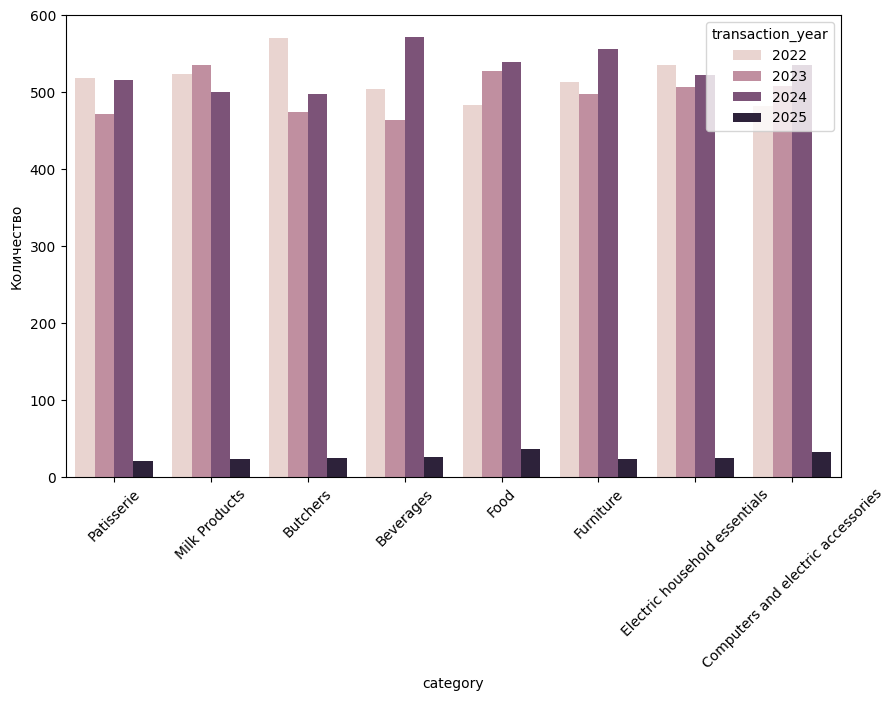

In [210]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'category', data =data, hue = 'transaction_year')
plt.xticks(rotation = 45)
plt.ylabel('Количество')

В распределении категорий по годам тоже не удается выбрать наиболее востребованную, все категории имеют примерно одинаковое количество транзакций, в течении нескольких лет. Только в 2025 году мы видим столбцы с маленькими значениями, но это обосновывается тем, что сбор данных производился в начале 2025 года

### Посмотрим на распределение данных в столбце `price_per_unit`

<Axes: xlabel='price_per_unit', ylabel='Count'>

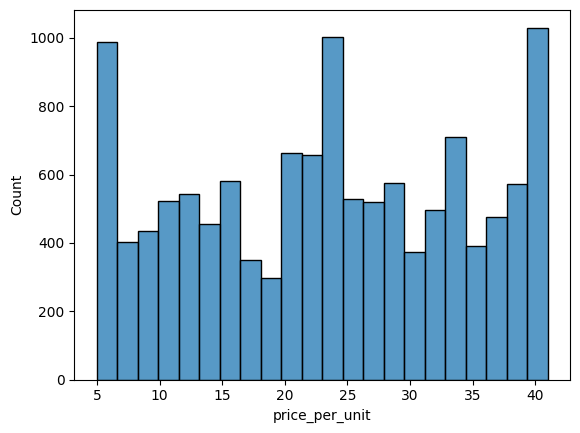

In [211]:
sns.histplot(data = data['price_per_unit'])

В распределении данных присутствуют пики некоторых значений, это основном самые дешевые или, наоборот, премиальные товары. Это распределение не является нормальным, оно скорее ближе к мультимодальному, Что типично для категорий товаров разного назначения

### Посмотрим на распределение данных в столбце `quantity`

Text(0, 0.5, 'Количество')

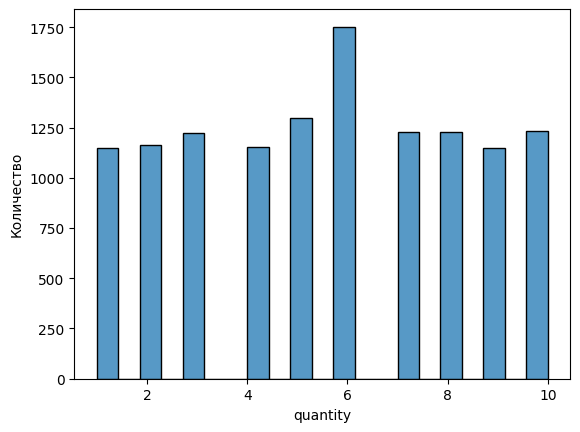

In [212]:
sns.histplot(data = data['quantity'])
plt.ylabel('Количество')

Количество единиц товара также распределено равномерно, однако наблюдается наибольшее количество значений с числом товаров равным 6, вероятно это связано с тем, что это значение близко к среднему, поэтому наиболее востребовано 

### Посмотрим на распределение данных в столбце `discount_applied`

In [213]:
data.groupby('discount_applied')['transaction_id'].count()

discount_applied
False      4157
True       4219
unknown    4199
Name: transaction_id, dtype: int64

Text(0, 0.5, 'Количество')

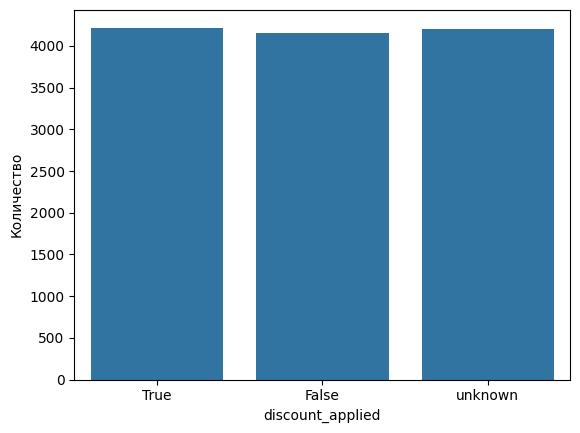

In [214]:
sns.countplot(x = 'discount_applied', data = data)
plt.ylabel('Количество')

В столбце `discount_applied` большое количество пропущенных значений (около трети от общего числа транзакций), которые в процессе предобработки были заменены на 'unknown'. При этом по имеющимся данным  можно говорить о равномерном распределении значений True и False, что свидельствует о сбалансированном применении скидки в покупках

### Посмотрим на распределение данных в столбце `item`

<Axes: ylabel='item'>

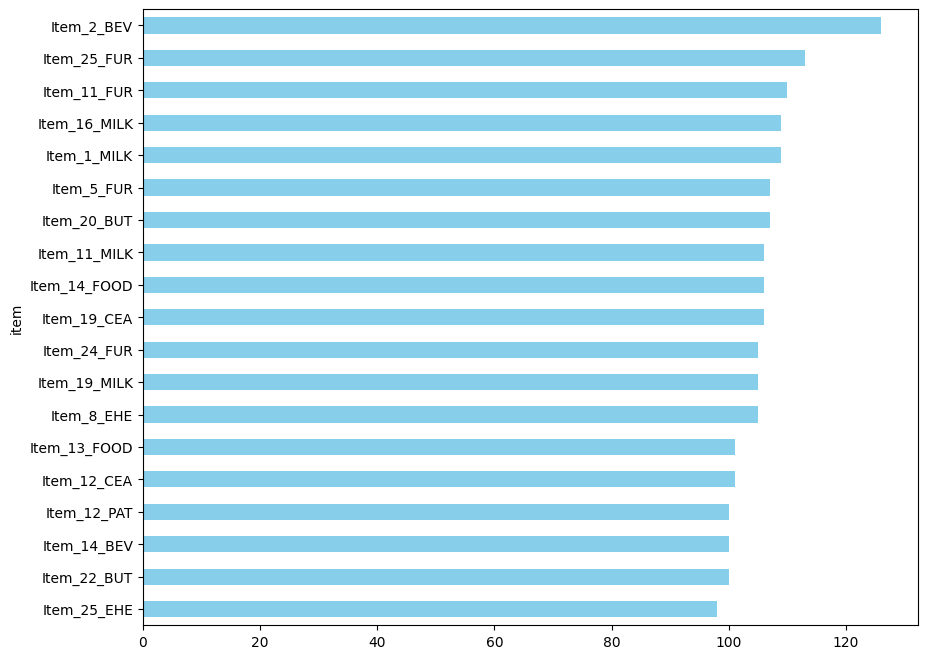

In [215]:


top_20_item = data.groupby('item')['quantity'].count().sort_values(ascending=False)[1:20]
plt.figure(figsize=(10, 8))
top_20_item.sort_values(ascending=True).plot(kind='barh', color='skyblue') 

В столбце `item` распределение транзакций на каждый товар относительно равномерно, однако присутствует небольшое преобладание у Item_2_BEV категории beverages

### Посмотрим на распределение данных в столбце `total_spent`

<BarContainer object of 4 artists>

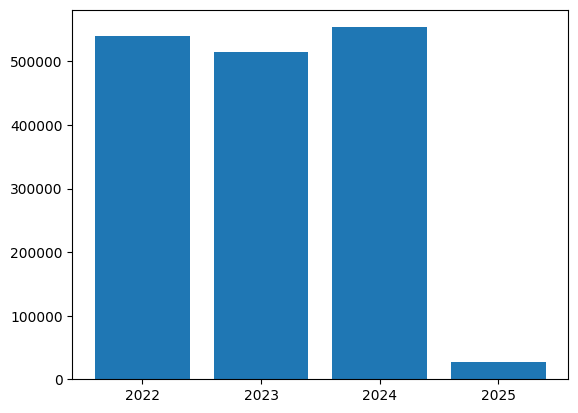

In [217]:
tot_spent_per_year = data.groupby('transaction_year')['total_spent'].sum()
plt.bar(tot_spent_per_year.index.astype('str'), tot_spent_per_year.values)

Общая годовая выручка держится примерно на одном уровне на протяжении нескольких лет, однако в 2024 году можно проследить неболоьшой рост выручки по сравнению с предыдущим годом. Так как сбор данных производился в начале 2025 года, то на данный момент выручка в этом году небольшая

### Зависимость выручки `total_spent` от различных факторов


#### Зависимость выручки `total_spent` от количества товаров `quantity`

Рассчитаем критерий корреляции

In [218]:
data[['total_spent', 'quantity']].corr()

,total_spent,quantity
total_spent,1.000000,0.704309
quantity,0.704309,1.000000


Построим диаграмму рассеивания

<Axes: xlabel='quantity', ylabel='total_spent'>

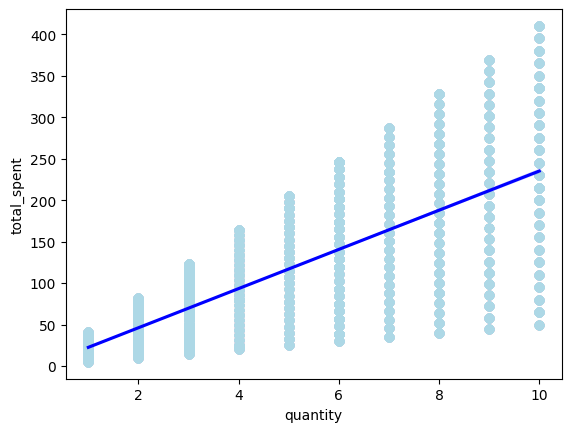

In [228]:
sns.regplot(
    x = 'quantity', 
    y = 'total_spent',
    data = data,
    scatter_kws = {'color': 'lightblue'}, line_kws = {'color': 'blue'}
)

Рассчитав критерий корреляции и построив диаграмму рассеивания, можно судить о сильной линейной взаимосвязи количества товара и общей выручки, то есть чем больше товаров в заказе, тем больше прибыль, что является логичным. Критерий корреляции равный 0.7 говорит о сильной взаимосвязи между двумя факторами. Вертикальное расположение столбцов диаграммы рассеивания свидетельствует о фиксированном количестве товара, которое представлено целым числом

#### Зависимость выручки `total_spent` от цены за единицу товара `price_per_unit`

In [220]:
data[['total_spent', 'price_per_unit']].corr()

,total_spent,price_per_unit
total_spent,1.000,0.641
price_per_unit,0.641,1.000


<Axes: xlabel='price_per_unit', ylabel='total_spent'>

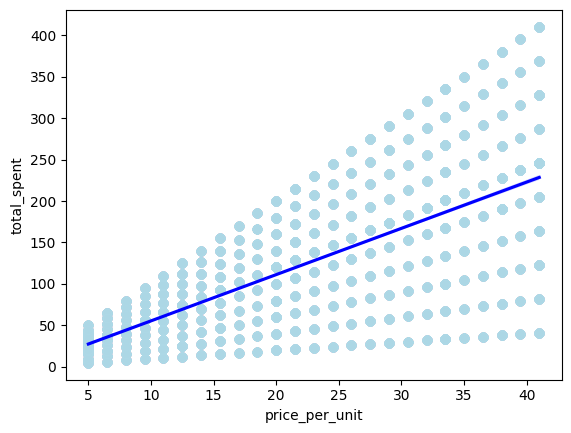

In [ ]:

sns.regplot(
    x = 'price_per_unit', 
    y = 'total_spent',
    data = data,
    scatter_kws = {'color': 'lightblue'}, line_kws = {'color': 'blue'}
)

#### Зависимость выручки `total_spent` от наличия скидки `discount_applied`

<Axes: xlabel='discount_applied', ylabel='total_spent'>

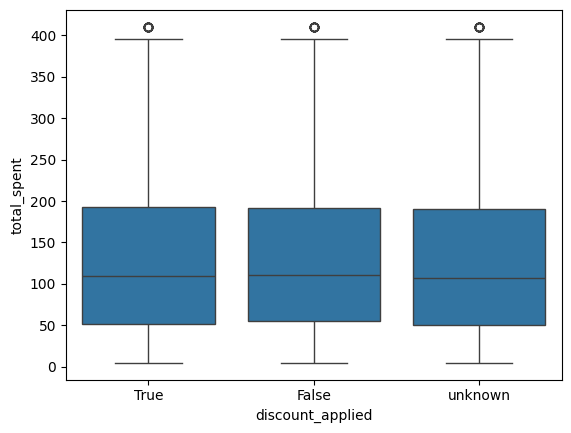

In [222]:
sns.boxplot(data = data, x = 'discount_applied', y = 'total_spent')

Распределение выручки (`total_spent`) при наличии скидки (True), её отсутствии (False) и неизвестном статусе (unknown) практически идентично.
Медианы, разброс и выбросы не демонстрируют заметных различий, что позволяет предположить, что применение скидок не оказывает существенного влияния на итоговую сумму покупки и, вероятно, не влияет на выручку магазина в целом.

#### Зависимость выручки `total_spent` от способа оплаты `payment_method`

<Axes: xlabel='payment_method', ylabel='total_spent'>

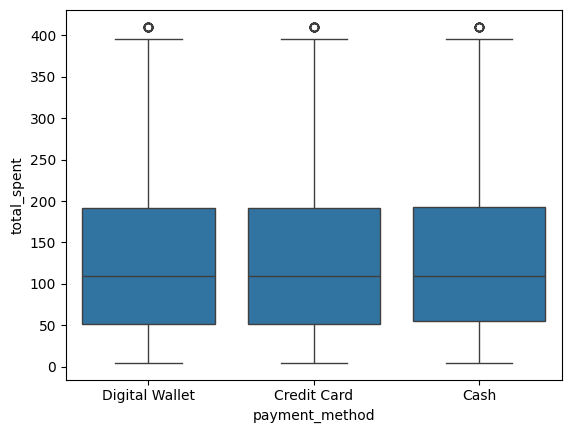

In [223]:
sns.boxplot(data = data, x = 'payment_method', y = 'total_spent')

Распределение выручки (`total_spent`) при различных способах оплаты практически идентично.
Медианы, разброс и выбросы не демонстрируют заметных различий, что позволяет предположить, что способ оплаты не оказывает существенного влияния на итоговую сумму покупки и, вероятно, не влияет на выручку магазина в целом.

#### Распределение выручки `total_spent` в зависимости от способа совершения покупки (онлайн или офлайн) `location`

<Axes: xlabel='location', ylabel='total_spent'>

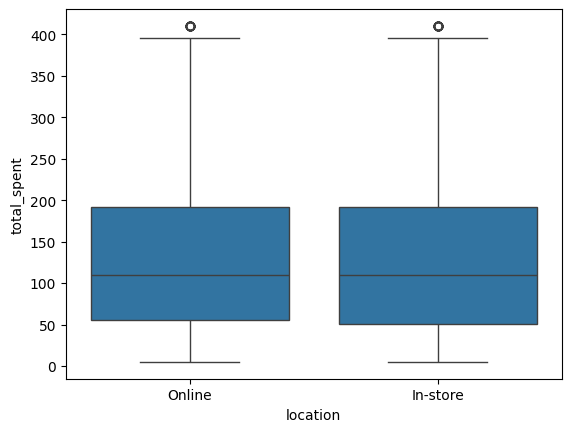

In [224]:
sns.boxplot(data = data, x = 'location', y = 'total_spent')

Распределение выручки (`total_spent`) при онлайн или офлайн покупках практически идентично.
Медианы, разброс и выбросы не демонстрируют заметных различий, что позволяет предположить, что способ соверщения не оказывает существенного влияния на итоговую сумму покупки и, вероятно, не влияет на выручку магазина в целом.

#### Распределение выручки `total_spent` в зависимости от категории товара `category`

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Patisserie'),
  Text(1, 0, 'Milk Products'),
  Text(2, 0, 'Butchers'),
  Text(3, 0, 'Beverages'),
  Text(4, 0, 'Food'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Electric household essentials'),
  Text(7, 0, 'Computers and electric accessories')])

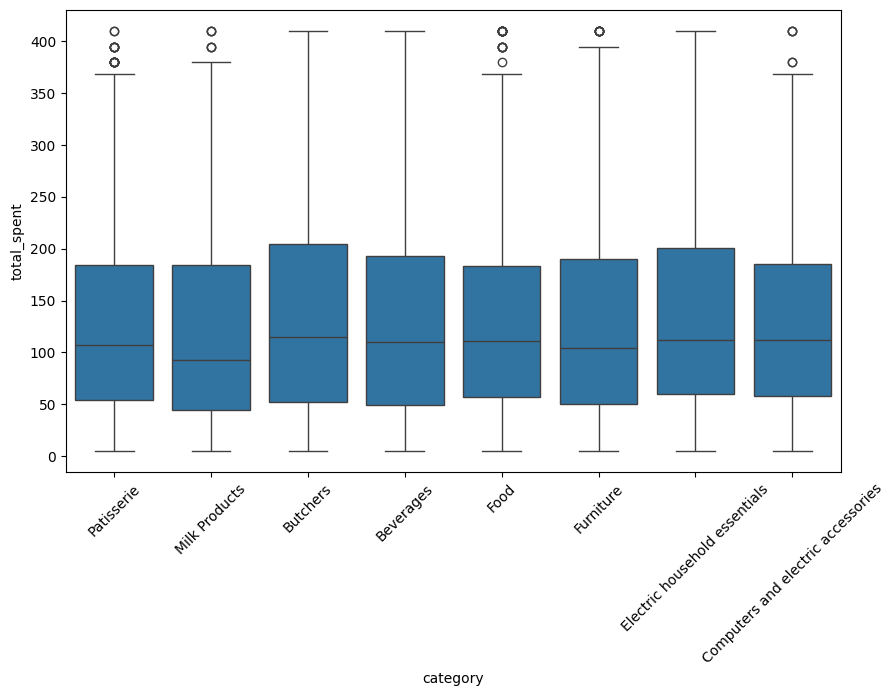

In [225]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = 'category', y = 'total_spent')
plt.xticks(rotation = 45)

Диаграмма рахмаха показывает распределение выручки по категориям товара. В целом все значения распредлены относительно равномерно, но есть некоторые преобладания. Самая высокая медиана наблюдается у категорий Butchers, Furniture, Electric household essentials. Наименьшая медиана у категории Milk. Также во многих категориях присутствуют выбросы, что может свидетельствовать о совешении больших дорогих покупок

## Вывод

Проведя анализ, были определены ключевые факторы, оказывающие влияние на выручку магазина. Первым этапом стала предобработка: пропущенные значения были либо восстановлены, либо заменены. В столбце `item` невозможно было воссстановить утерянные данные и пропущенные значения были заменены на unknown, в столбце `price_per_unit` пропуски удалось заполнить поделив стоимость заказа (`total_spent`) на количество товара в заказе (`quantity`), в столбце `quantity` были заменены на медианное значение количества товара для каждой категории, пропущенные значения в столбце `discount_applied` ввиду их большого количества нельзя было просто удалить, поэтому пропуски в этом столбце также были заполнены unknown. Далее был анализ аномалий и больших значений, почти во всех столбцах аномалии отсутствовали, только в `total_spent` был выявлен выброс, который было принято решение не убирать, так как .вероятнее всего это крупная, но нормальная покупка, не влияющая на общий тренд. Также были добавлены новые стоолбцы с месяцем транзакции, годом транзакции, а также столбец для помесячного анализа данных за каждый год. <br> <br><br>
Далее проводился исследовательский анализ. Во многих столбцах наблюдалось равномерное распределение (`location`, `payment_method`, `category`, `discount_applied`), в столбце `price_per_unit` наблюдались пики дешевых и дорогих товаров, в столбце `quantity` прослеживалось преобладание корзины из шести товаров. Распределение годовой выручки в течение нескольких лет также является одномерным, с небольшим преобладанием в 2024 году. <br><br><br>
Затем происходил анализ влияния различных факторов на выручку. В ходе анализа было выявлено что единственные два фактора, которые оказывают влияние на общую выручку, это количество товаров в заказе и цена за единицу товара, такие выводы были сделаны на основании значения коэффициентов корреляции (0.7, 0.6) и на основании анализа диаграммы рассеивания. Была обнаружено небольшая зависимость выручки от категории товара на диаграмме размаха. Самая высокая медиана наблюдается у категорий Butchers, Furniture, Electric household essentials. Наименьшая медиана у категории Milk. Также во многих категориях присутствуют выбросы, что может свидетельствовать о совешении больших дорогих покупок. <br><br><br>
Логичность полученных результатов и отсутствие влияния других признаков, вероятно, объясняется синтетическим характером набора данных. Данные были сформированы для отработки ключевых навыков анализа и упор в основном делался на предобработку данных, ведь изначально в датафрейме было много пропусков, которые пришлось устранять. 